# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Importing support libraries
import numpy as np ## for numerical calculations of arrays
import pandas as pd ## for reading csv file and wroking with dataframe operations
from PIL import Image ## for image processing and output
import cv2 ## for image processing
import matplotlib.pyplot as plt
from numpy import linalg as LA ## numpy's Linear Algebra library
import os ## for reading images from image folder
import math
from sklearn.model_selection import train_test_split
from scipy.spatial import distance ## for calculating distance between two entities
import requests ## to get the file from url

In [3]:
y = []
initial = 0
j=0

In [4]:
## BASE is the name of the base folder
BASE = "./drive/MyDrive/ColabData/ATnT"

# img = cv2.imread(BASE + '/1-01.jpg', 0) # '0' for reading grayscale images
# IMG_SHAPE = img.shape
filepaths = [] # Contains the absolute paths of all the image files
for filename in os.listdir(BASE):
  p = BASE+'/'+filename
  if os.path.isdir(p):
    for filename1 in os.listdir(p):
      filepaths.append(p + '/' + filename1)
      y.append(initial)
    initial+=1
# filepaths.sort()

## Converting filepaths list to dataframe
df = pd.DataFrame({'filepaths':filepaths})
print(df)

                                     filepaths
0    ./drive/MyDrive/ColabData/ATnT/s38/10.pgm
1     ./drive/MyDrive/ColabData/ATnT/s38/1.pgm
2     ./drive/MyDrive/ColabData/ATnT/s38/5.pgm
3     ./drive/MyDrive/ColabData/ATnT/s38/2.pgm
4     ./drive/MyDrive/ColabData/ATnT/s38/8.pgm
..                                         ...
395   ./drive/MyDrive/ColabData/ATnT/s13/3.pgm
396   ./drive/MyDrive/ColabData/ATnT/s13/7.pgm
397   ./drive/MyDrive/ColabData/ATnT/s13/6.pgm
398   ./drive/MyDrive/ColabData/ATnT/s13/9.pgm
399   ./drive/MyDrive/ColabData/ATnT/s13/5.pgm

[400 rows x 1 columns]


In [5]:
total_images = 400
total_classes = 40
face_vector = []

In [6]:
for i in range(total_images):
      image = Image.open(filepaths[i]).convert("L")
      image = np.array(image)
      new_image = image.flatten()
      face_vector.append(new_image)
      
face_vector = np.asarray(face_vector)
print("face_vector shape: ", face_vector.shape)
y = np.asarray(y)

face_vector shape:  (400, 10304)


In [8]:
# X_train, X_test, y_train, y_test = train_test_split(face_vector,y, test_size=0.25,stratify=y, random_state=0)
X_train = face_vector

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [9]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_compoonents):
  avg_face_vector = X_train.mean(axis=0)
  print(avg_face_vector.shape)
  # avg_face_vector = avg_face_vector.reshape(1,X_train.shape[1])
  normalized_face_vector = X_train - avg_face_vector
  covariance_matrix = np.cov(np.transpose(normalized_face_vector))
  eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
  eigen_vectors = eigen_vectors[:,::-1]
  return eigen_values, eigen_vectors, covariance_matrix, normalized_face_vector

In [10]:
eigen_values, eigen_vectors, covariance_matrix, normalized_face_vector = principalComponentAnalysis(X_train, 20)

(10304,)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [64]:
face_vector1 = face_vector - np.mean(face_vector,axis =0)

In [70]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(eigen_vectors,k):
  ke = eigen_vectors[:,:k]
  facevector2 = np.dot(face_vector1,ke)
  eigen_faces_const = np.dot(facevector2,ke.T)+np.mean(face_vector,axis =0)

  return eigen_faces_const , face_vector1

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
# k=500

In [52]:
# eigen__faces , face_vector1 = imageReconstruction(eigen_vectors ,k)

In [71]:
imm = []
yy = []
k = [5,10,50,100,1000,10304]
for i in range(6):
  eigen__f , fv = imageReconstruction(eigen_vectors ,k[i])
  for j in range(10):
    yy.append(y[j*10])
    imm.append(Image.fromarray(eigen__f[j*10].reshape(112, 92).astype('uint8')))

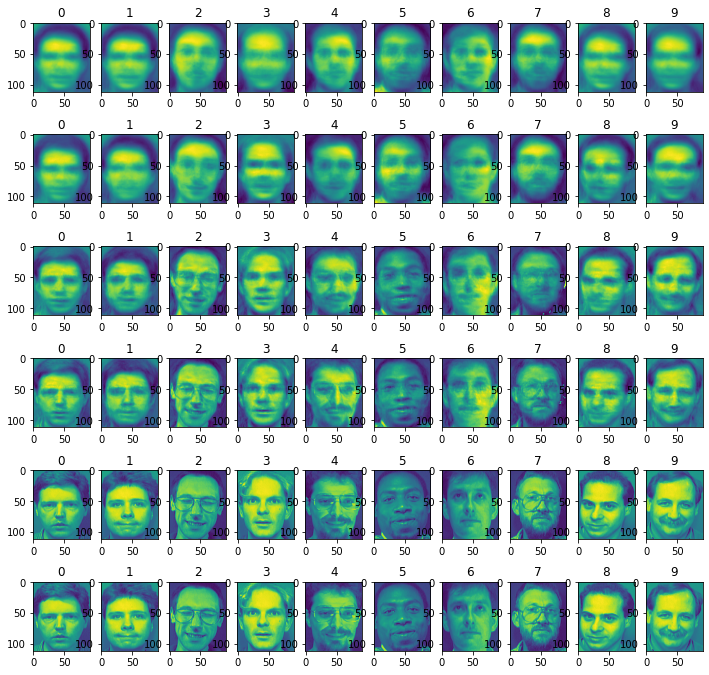

In [72]:
_, axs = plt.subplots(6, 10, figsize=(12, 12))
axs = axs.flatten()
ind =0
for img, ax in zip(imm, axs):
    ax.set_title(yy[ind])
    ax.imshow(img)
    ind+=1
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [77]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def calc_error(transformed_image , orig_image): 
    error = (np.sum((transformed_image - orig_image)**2))
    return error
def model(k):
  se = eigen_vectors[:,:k]
  se.shape
  eigen_faces = np.dot(face_vector1,se)
  eigen_faces.shape
  X_train, X_test, y_train, y_test = train_test_split(eigen_faces,y, test_size=0.1,stratify=y, random_state=1)
  pred = []
  pred_imgs = []
  errors = []

  print(X_train.shape[1])

  n = X_train.shape[1]
  for i in range(X_test.shape[0]):
      min_error = np.Inf
      min_error_label = -1
      min_error_image = -1
      for j in range(X_train.shape[0]):
          error = calc_error(X_test[i],X_train[j])
          if error < min_error:
              min_error = error
              min_error_label = y_train[j]
              min_error_image = X_train[j]
      pred.append(min_error_label)
      pred_imgs.append(min_error_image)
      errors.append(min_error)

  # print(pred)
  return pred , y_test , errors

In [78]:
pcs = [5 , 10 , 50 , 100 , 1000,10304]
l=[]
mean_sq_error = []
log_mse = []
for j in pcs:
  pred , y_test , errors= model(j)
  count = 0
  mse = np.mean(errors)/j
  mean_sq_error.append(mse)

  lmse = np.log(mse)
  log_mse.append(lmse)
  for i in range(len(y_test)):
    if(pred[i] == y_test[i]):
      count += 1

  print("Acc: ",j, count/len(y_test))
  l.append(count/len(y_test))

5
Acc:  5 0.85
10
Acc:  10 0.975
50
Acc:  50 0.95
100
Acc:  100 0.95
1000
Acc:  1000 0.95
10304
Acc:  10304 0.95


In [19]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

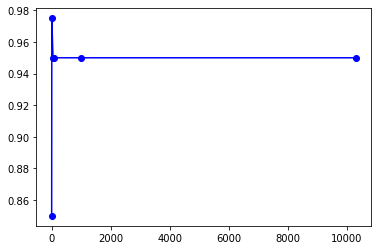

In [40]:
plt.plot(pcs,l, 'bo-')
plt.show()

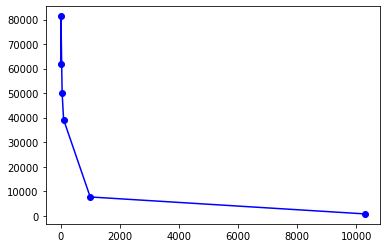

In [41]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(pcs,mean_sq_error, 'bo-')
plt.show()

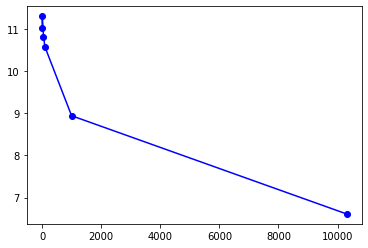

In [42]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(pcs,log_mse, 'bo-')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**

Accuracy is increasing first as we incresing the value of pc and after a particular value it is becoming constant.
Although accuracy is now not increaing but the mean square error is decreasing as pc is increased.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**

Principal Component Analysis (PCA) is a technique used for data reduction and feature extraction. It is a statistical method that is widely used in data analysis and pattern recognition tasks. Here are the advantages and limitations of PCA in general:

Advantages of PCA:

Dimensionality reduction: PCA can reduce the dimensionality of high-dimensional data by projecting it onto a lower-dimensional space while retaining as much of the original information as possible.
Feature extraction: PCA can identify the most important features or patterns in the data, which can be useful for understanding the underlying structure of the data or for identifying important variables in a complex system.
Noise reduction: PCA can help to reduce noise or variability in the data, making it easier to identify meaningful patterns or relationships.
Limitations of PCA:

Interpretability: The principal components generated by PCA may not always be easy to interpret, particularly if there are many features in the data.
Linearity: PCA assumes that the relationships between the features in the data are linear, which may not always be the case.
Data scaling: PCA can be sensitive to the scaling of the data, so it is important to preprocess the data appropriately before applying PCA.
In the context of face recognition, PCA has some additional limitations:

Illumination variations: PCA can be sensitive to variations in illumination, which can cause significant changes in the appearance of a face.
Non-linear variations: PCA assumes that the variations in facial features are linear, which may not always be the case in practice.
Limited expressiveness: PCA may not capture all of the subtle differences between faces, particularly if there is significant variation in facial features within a population.